In [62]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<h1> Logistic Regression</h1>

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



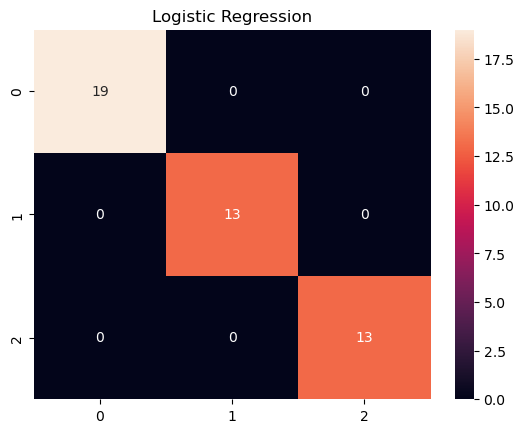

In [64]:
from sklearn.linear_model import LogisticRegression

# Create and train model
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title("Logistic Regression")
plt.show()

<h1> k-Nearest Neighbors (k-NN)</h1>

In [66]:
from sklearn.neighbors import KNeighborsClassifier

# Experiment with different k values
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


<h1>Support Vector Machines (SVM)</h1>

In [68]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')  # Try 'rbf' for non-linear
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


<h1>Decision Trees</h1>

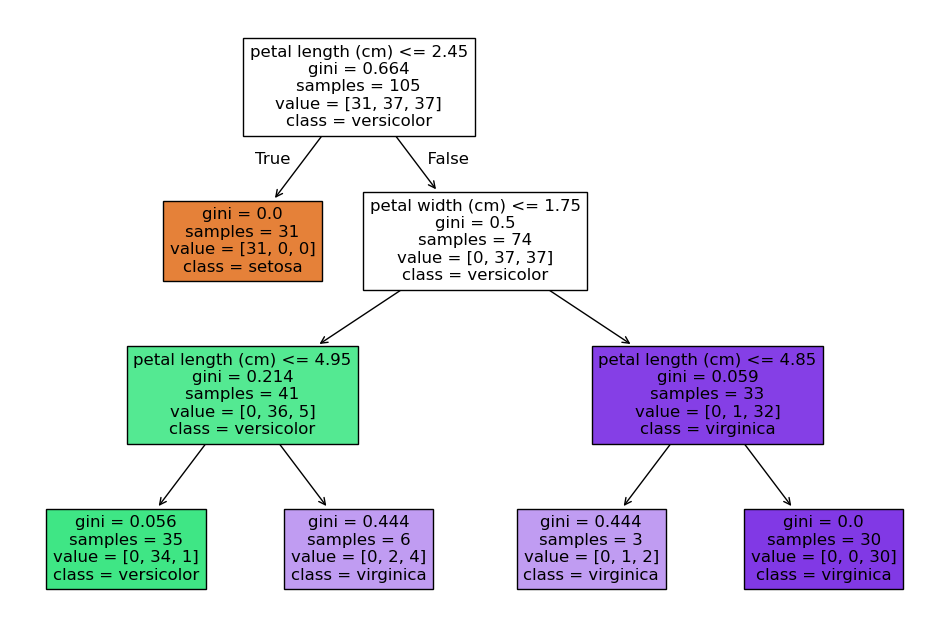

In [70]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=iris.feature_names, 
          class_names=iris.target_names, filled=True)
plt.show()

<h1>Random Forests</h1>

In [72]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Feature importances:", rf.feature_importances_)

Feature importances: [0.10581887 0.04973065 0.40327893 0.44117155]


<h1>Gradient Boosting (XGBoost)</h1>

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

<h1>Naive Bayes</h1>

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print(confusion_matrix(y_test, y_pred))

<h1>Model Comparison</h1>

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "k-NN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Naive Bayes": GaussianNB()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)

pd.DataFrame(results.items(), columns=["Model", "Accuracy"]).sort_values("Accuracy", ascending=False)